### **Data**

[Transactions Data Bank ⛔||⛔ Fraud Detection](https://www.kaggle.com/datasets/qusaybtoush1990/transactions-data-bank-fraud-detection?resource=download)

### **Импорт библиотек**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown, HTML
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder, TargetEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, StratifiedGroupKFold, GridSearchCV

### **Загрузка данных**

In [2]:
data = pd.read_csv('../data/raw/Fraud.csv')

### **Описание датасета**

|Сolumn  | Description |
|------------|-------------|
|Date | Date of Transaction|
|nameOrig | User Name or Account number|
|amount | Money in this transaction|
|oldbalanceOrg | How much the client had money before transaction|
|newbalanceOrig | How much the client have after the transaction|
|City |where the transaction happened which city|
|type | Type of transaction TRANSFER \ CASH_OUT, CASH_IN ,DEBIT,PAYMENT|
|Card Type | The card type the client has \ Platinum ,Gold ,Silver ,Signature ,Classic ,Mass|
|Exp Type | The purpose for transaction \ Food, Entertainment, Fuel, Bills, Grocery, Travel, Personal_Care, Health_Fitness, Home|
|Gender |Male or Female|
|isFraud | 0 = no fraud, 1 = fraud|


#### **Вывод первых и последних значений**

In [ ]:
data.head()

,Date,nameOrig,amount,oldbalanceOrg,newbalanceOrig,City,type,Card Type,Exp Type,Gender,isFraud
0,26-May-13,C2011200430,242.0,302.0,60.0,"Ahmedabad, India",TRANSFER,Gold,Food,F,1
1,26-Jul-12,C931301500,7081.0,46066.0,38985.0,"Delhi, India",TRANSFER,Gold,Entertainment,M,1
2,12-Apr-12,C963642457,16355.0,30355.0,14000.0,"Kolkata, India",TRANSFER,Silver,Fuel,F,1
3,28-Jan-12,C1439438217,20820.0,39663.0,18843.0,"Lucknow, India",TRANSFER,Gold,Food,F,1
4,16-Apr-14,C892940485,6071.0,35586.0,29515.0,"Bengaluru, India",TRANSFER,Gold,Fuel,M,1


In [ ]:
data.tail()

,Date,nameOrig,amount,oldbalanceOrg,newbalanceOrig,City,type,Card Type,Exp Type,Gender,isFraud
1048569,20-Jan-14,C1273896430,105150.78,38300000.0,38194849.22,"Kanpur, India",CASH_IN,Platinum,Fuel,F,0
1048570,06-Mar-14,C1450387949,376022.62,38600000.0,38223977.38,"Kanpur, India",CASH_IN,Gold,Grocery,F,0
1048571,13-Mar-13,C1040382471,77083.57,38400000.0,38322916.43,"Jaipur, India",CASH_IN,Gold,Fuel,F,0
1048572,02-Apr-14,C1576842193,121569.82,38400000.0,38278430.18,"Surat, India",CASH_IN,Platinum,Grocery,F,0
1048573,02-Apr-13,C1841909664,6808.99,38900000.0,38893191.01,"Lucknow, India",CASH_IN,Signature,Bills,M,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Date            1048574 non-null  object 
 1   nameOrig        1048574 non-null  object 
 2   amount          1048574 non-null  float64
 3   oldbalanceOrg   1048574 non-null  float64
 4   newbalanceOrig  1048574 non-null  float64
 5   City            1048574 non-null  object 
 6   type            1048574 non-null  object 
 7   Card Type       1048574 non-null  object 
 8   Exp Type        1048574 non-null  object 
 9   Gender          1048574 non-null  object 
 10  isFraud         1048574 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 88.0+ MB


In [ ]:
data.shape

(1048574, 11)

In [ ]:
data.isna().sum()

,0
Date,0
nameOrig,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
City,0
type,0
Card Type,0
Exp Type,0
Gender,0


In [ ]:
data.isnull().sum()

,0
Date,0
nameOrig,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
City,0
type,0
Card Type,0
Exp Type,0
Gender,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.describe()

,amount,oldbalanceOrg,newbalanceOrig,isFraud
count,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06
mean,3.802767e+04,8.801983e+05,8.421706e+05,1.676420e-01
std,1.105168e+05,2.969968e+06,2.936373e+06,3.735482e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.470000e+02,4.343812e+03,9.180000e+02,0.000000e+00
50%,8.263000e+03,3.653918e+04,2.055200e+04,0.000000e+00
75%,2.365000e+04,1.366425e+05,9.030729e+04,0.000000e+00
max,1.000000e+07,3.890000e+07,3.889319e+07,1.000000e+00


In [ ]:
data.describe(include='object')

,Date,nameOrig,City,type,Card Type,Exp Type,Gender
count,1048574,1048574,1048574,1048574,1048574,1048574,1048574
unique,1326,1048316,986,5,6,9,2
top,26-Apr-14,C422210949,"Bengaluru, India",CASH_OUT,Silver,Food,F
freq,1167,2,143733,373641,275540,220115,551182


In [ ]:
def fmt(x, nd=2):  # 1 234 567.89
    return f'{x:,.{nd}f}'.replace(',', ' ')

desc = data[['amount','oldbalanceOrg','newbalanceOrig','isFraud']].describe().T
desc_fmt = desc.copy()
for c in desc.columns:
    nd = 0 if c in ['count','min','25%','50%','75%','max'] else 2
    desc_fmt[c] = desc[c].map(lambda v: fmt(v, nd))
print(desc_fmt)


                    count        mean           std min    25%     50%  \
amount          1 048 574   38 027.67    110 516.83   0    647   8 263   
oldbalanceOrg   1 048 574  880 198.29  2 969 967.50   0  4 344  36 539   
newbalanceOrig  1 048 574  842 170.62  2 936 373.40   0    918  20 552   
isFraud         1 048 574        0.17          0.37   0      0       0   

                    75%         max  
amount           23 650  10 000 000  
oldbalanceOrg   136 643  38 900 000  
newbalanceOrig   90 307  38 893 191  
isFraud               0           1  


In [ ]:
cols = ['amount','oldbalanceOrg','newbalanceOrig','isFraud']

# счётчики нулей и доли
zeros_cnt = (data[cols] == 0).sum().rename('zeros_cnt')
zeros_pct = (data[cols] == 0).mean().mul(100).round(2).rename('zeros_%')

# приклеим к твоему desc_fmt
desc_with_zeros = desc_fmt.join(pd.concat([zeros_cnt, zeros_pct], axis=1))

# красивый формат для счетчика
desc_with_zeros['zeros_cnt'] = desc_with_zeros['zeros_cnt'].map(lambda v: f'{v:,}'.replace(',', ' '))

print(desc_with_zeros)


                    count        mean           std min    25%     50%  \
amount          1 048 574   38 027.67    110 516.83   0    647   8 263   
oldbalanceOrg   1 048 574  880 198.29  2 969 967.50   0  4 344  36 539   
newbalanceOrig  1 048 574  842 170.62  2 936 373.40   0    918  20 552   
isFraud         1 048 574        0.17          0.37   0      0       0   

                    75%         max zeros_cnt  zeros_%  
amount           23 650  10 000 000   180 353    17.20  
oldbalanceOrg   136 643  38 900 000   180 128    17.18  
newbalanceOrig   90 307  38 893 191   181 615    17.32  
isFraud               0           1   872 789    83.24  


> Пропуски, дубликаты, нулевые значения ***отсутствуют***

In [ ]:
data.columns

Index(['Date', 'nameOrig', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'City',
       'type', 'Card Type', 'Exp Type', 'Gender', 'isFraud'],
      dtype='object')

In [ ]:
print("Доля мошеннических операций в датасете:")
print(data['isFraud'].value_counts()/ len(data) * 100 )

Доля мошеннических операций в датасете:
isFraud
0    83.235804
1    16.764196
Name: count, dtype: float64


In [ ]:
print('Число операций, совершенных конкретным пользователем')
data['nameOrig'].value_counts() #

Число операций, совершенных конкретным пользователем


,count
nameOrig,
C422210949,2
C637055752,2
C1738972765,2
C1214450722,2
C620899653,2
...,...
C502290755,1
C839317242,1
C1464274506,1


In [ ]:
print(f'Всего операций в датасете {data.shape[0]}. Пользователей банка {data['nameOrig'].value_counts().count()}')

Всего операций в датасете 1048574. Пользователей банка 1048316


###**Круговая диаграмма количества совершенных операций по типам транзакций**

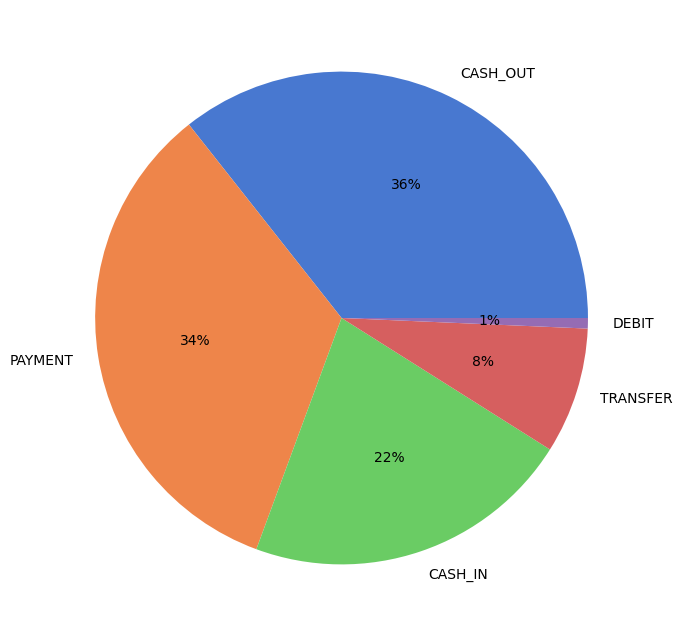

In [ ]:
display(Markdown('###**Круговая диаграмма количества совершенных операций по типам транзакций**'))
# data['type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(data['type'].value_counts().values, labels=data['type'].value_counts().index, colors=sns.color_palette('muted'), autopct='%.0f%%')
plt.show()

####**Проверка данных на наличие ошибочных**
Есть в данных что-то по типу отрицательного возраста или пятиметровый рост человека, 3-го класса в задаче бинарной классификации. Обработка ошибок

##### **Разница между балансами**

In [ ]:
data[round(abs(data['newbalanceOrig'] - data['oldbalanceOrg']),2) != round(abs(data['amount']),2)]

,Date,nameOrig,amount,oldbalanceOrg,newbalanceOrig,City,type,Card Type,Exp Type,Gender,isFraud


> amount равен разнице между новым и старым балансом

##### **Распределение количества операций по дням**

In [ ]:
# Преобразуем Date из str в datetime
data['Date'] = data['Date'].apply(lambda x: datetime.strptime(x, '%d-%b-%y'))

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce',  format='%d-%b-%y')

In [ ]:
print(data['Date'][0])
print(type(data['Date'][0]))

2013-05-26 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Text(0, 0.5, 'Количество')

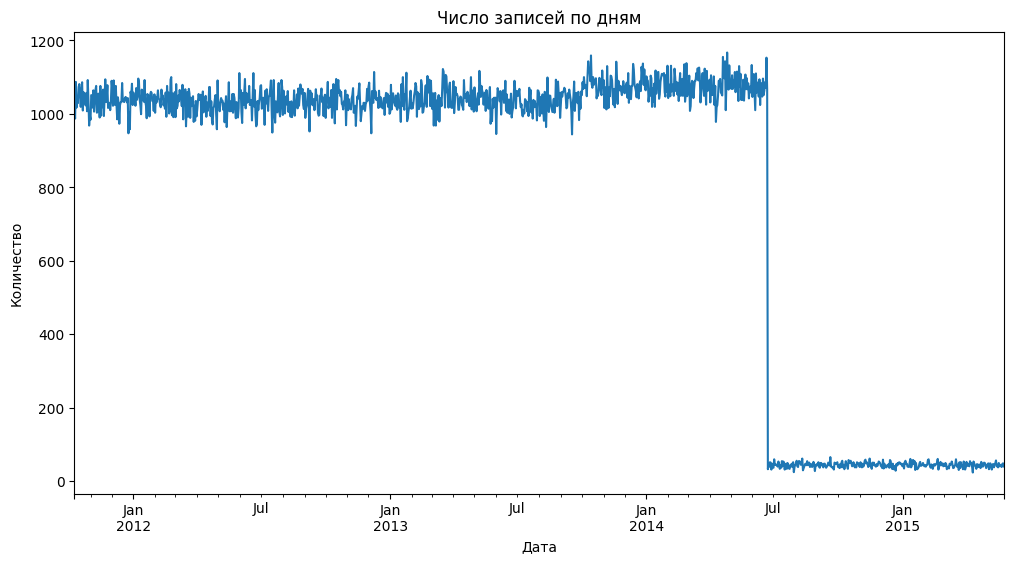

In [ ]:
daily_counts = (data
                .groupby(data['Date'])
                .size())

ax = daily_counts.plot(figsize=(12,6), title='Число записей по дням')
ax.set_xlabel('Дата')
ax.set_ylabel('Количество')


> в распределении данных наблюдается какая-то аномалия

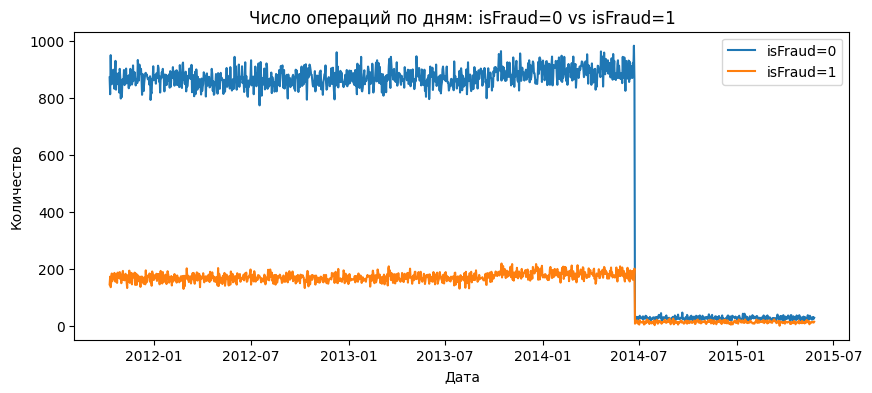

In [ ]:
# считаем число операций по дням и классу isFraud
daily_fraud = (
    data
    .assign(date=data['Date'].dt.date)
    .groupby(['date', 'isFraud'])
    .size()
    .unstack('isFraud', fill_value=0)
    .sort_index()
)

ax = daily_fraud.plot(figsize=(10,4), title='Число операций по дням: isFraud=0 vs isFraud=1')
ax.set_xlabel('Дата'); ax.set_ylabel('Количество')
ax.legend(['isFraud=0', 'isFraud=1'])

> окей. вопрос такого спадка числа ежеденых операций остаётся открытым

гипотезы:
*    отток клиентов
*    уход в чёрную




####**В каких городах/странах совершались операции?**

In [ ]:
data['City'].apply(lambda x: x.split(', ')[1]).unique()

array(['India'], dtype=object)

> Все операции совершались в Индии

###**Круговая диаграмма распределения совершения транзакций по ТОП-10 городам**

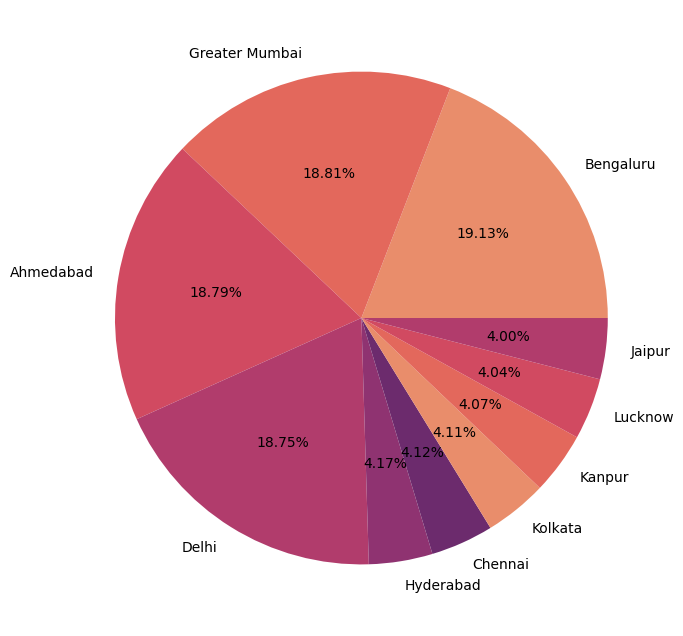

In [ ]:
display(Markdown('###**Круговая диаграмма распределения совершения транзакций по ТОП-10 городам**'))
top_transaction_cities = data['City'].apply(lambda x: x.split(', ')[0]).value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_transaction_cities.values, labels=top_transaction_cities.index, colors=sns.color_palette('flare'), autopct='%.2f%%')
plt.show()

> 4 крупнейших сегмента (вместе ~76%):

*   Бенгалуру
*   Дели
*   Ахмедабад
*   Мумбаи

> Остальные 6 городов (суммарно ~24%)
*   Хайдарабад
*   Ченнаи
*   Колката
*   Канпур
*   Лакхнау
*   Джайпур

####**Изучение поведения каждого признака в отдельности**
\+ проверить его связь с целевой переменной, а также попарные корреляции (в т.ч и в особенности с таргетом).

In [3]:
# преобразование обратного гиперболического синуса  применяем к колонкам баланса и сумм перевода, чтобы понизить размерность
log_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig']
for f in log_features:
    data[f] = data[f].apply(lambda x: np.log(x + np.sqrt(x ** 2 + 1)))

data.head()

,Date,nameOrig,amount,oldbalanceOrg,newbalanceOrig,City,type,Card Type,Exp Type,Gender,isFraud
0,26-May-13,C2011200430,6.182089,6.403577,4.787561,"Ahmedabad, India",TRANSFER,Gold,Food,F,1
1,26-Jul-12,C931301500,9.558318,11.430978,11.264079,"Delhi, India",TRANSFER,Gold,Entertainment,M,1
2,12-Apr-12,C963642457,10.395436,11.013864,10.239960,"Kolkata, India",TRANSFER,Silver,Fuel,F,1
3,28-Jan-12,C1439438217,10.636817,11.281321,10.537044,"Lucknow, India",TRANSFER,Gold,Food,F,1
4,16-Apr-14,C892940485,9.404426,11.172855,10.985801,"Bengaluru, India",TRANSFER,Gold,Fuel,M,1


In [29]:
X = data.drop(['isFraud', 'Date', 'nameOrig'], axis=1)
y = data['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [30]:
X_train = X_train.reset_index()
X_train.head()

,index,amount,oldbalanceOrg,newbalanceOrig,City,type,Card Type,Exp Type,Gender
0,633891,12.770323,12.892709,10.731559,"Bengaluru, India",CASH_OUT,Gold,Entertainment,M
1,457483,0.000000,0.000000,0.000000,"Greater Mumbai, India",PAYMENT,Platinum,Entertainment,M
2,486290,0.000000,0.000000,0.000000,"Ahmedabad, India",CASH_OUT,Platinum,Food,F
3,262040,8.397057,8.738415,7.497762,"Hyderabad, India",CASH_OUT,Signature,Entertainment,M
4,660321,10.269170,10.337002,7.612555,"Greater Mumbai, India",PAYMENT,Silver,Fuel,F


In [31]:
X_train.drop('index', axis=1, inplace=True)
X_train.head()

,amount,oldbalanceOrg,newbalanceOrig,City,type,Card Type,Exp Type,Gender
0,12.770323,12.892709,10.731559,"Bengaluru, India",CASH_OUT,Gold,Entertainment,M
1,0.000000,0.000000,0.000000,"Greater Mumbai, India",PAYMENT,Platinum,Entertainment,M
2,0.000000,0.000000,0.000000,"Ahmedabad, India",CASH_OUT,Platinum,Food,F
3,8.397057,8.738415,7.497762,"Hyderabad, India",CASH_OUT,Signature,Entertainment,M
4,10.269170,10.337002,7.612555,"Greater Mumbai, India",PAYMENT,Silver,Fuel,F


In [32]:
X_test = X_test.reset_index()
X_test.drop('index', axis=1, inplace=True)

In [ ]:
encoder = OneHotEncoder(drop='first')
encoder.fit(X_train[['type', 'Card Type', 'Exp Type', 'Gender']])
encoded_cat = pd.DataFrame(encoder.transform(X_train[['type', 'Card Type', 'Exp Type', 'Gender']]).toarray(), columns=encoder.get_feature_names_out())
encoded_cat.head()

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,Card Type_Gold,Card Type_Mass,Card Type_Platinum,Card Type_Signature,Card Type_Silver,Exp Type_Entertainment,Exp Type_Food,Exp Type_Fuel,Exp Type_Grocery,Exp Type_Health_Fitness,Exp Type_Home,Exp Type_Personal_Care,Exp Type_Travel,Gender_M
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
encoded_cat_test = pd.DataFrame(encoder.transform(X_test[['type', 'Card Type', 'Exp Type', 'Gender']]).toarray(), columns=encoder.get_feature_names_out())

In [35]:
X_train_enc = pd.concat([X_train.drop(['type', 'Card Type', 'Exp Type', 'Gender'], axis=1), encoded_cat], axis=1).reset_index(drop=True)
X_train_enc.head()

,amount,oldbalanceOrg,newbalanceOrig,City,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,Card Type_Gold,Card Type_Mass,...,Card Type_Silver,Exp Type_Entertainment,Exp Type_Food,Exp Type_Fuel,Exp Type_Grocery,Exp Type_Health_Fitness,Exp Type_Home,Exp Type_Personal_Care,Exp Type_Travel,Gender_M
0,12.770323,12.892709,10.731559,"Bengaluru, India",1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.000000,0.000000,"Greater Mumbai, India",0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.000000,0.000000,"Ahmedabad, India",1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.397057,8.738415,7.497762,"Hyderabad, India",1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,10.269170,10.337002,7.612555,"Greater Mumbai, India",0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
X_test_enc = pd.concat([X_test.drop(['type', 'Card Type', 'Exp Type', 'Gender'], axis=1), encoded_cat_test], axis=1).reset_index(drop=True)

In [46]:
X_test_enc.head()

,amount,oldbalanceOrg,newbalanceOrig,City,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,Card Type_Gold,Card Type_Mass,...,Card Type_Silver,Exp Type_Entertainment,Exp Type_Food,Exp Type_Fuel,Exp Type_Grocery,Exp Type_Health_Fitness,Exp Type_Home,Exp Type_Personal_Care,Exp Type_Travel,Gender_M
0,0.000000,0.000000,0.000000,"Greater Mumbai, India",0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,8.212802,11.450518,11.410473,"Bengaluru, India",0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,8.772809,11.058638,10.951398,"Ahmedabad, India",0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12.069647,17.847980,17.844881,"Karimnagar, India",0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12.984888,15.507890,15.424271,"Pune, India",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
target_encoder = TargetEncoder(random_state=42)
target_encoder.fit(X_train_enc, y_train)
X_train_enc = pd.DataFrame(target_encoder.transform(X_train_enc), columns=X_train_enc.columns)
X_train_enc.head()

,amount,oldbalanceOrg,newbalanceOrig,City,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,Card Type_Gold,Card Type_Mass,...,Card Type_Silver,Exp Type_Entertainment,Exp Type_Food,Exp Type_Fuel,Exp Type_Grocery,Exp Type_Health_Fitness,Exp Type_Home,Exp Type_Personal_Care,Exp Type_Travel,Gender_M
0,0.000000,0.000000,0.338986,0.171437,0.243387,0.168406,0.245945,0.12161,0.166865,0.16754,...,0.166995,0.166359,0.167479,0.166976,0.167733,0.167539,0.167541,0.167536,0.16775,0.167481
1,0.008137,0.008133,0.014749,0.169808,0.125499,0.168406,0.013687,0.12161,0.167756,0.16754,...,0.166995,0.166359,0.167479,0.166976,0.167733,0.167539,0.167541,0.167536,0.16775,0.167481
2,0.008137,0.008133,0.014749,0.169058,0.243387,0.168406,0.245945,0.12161,0.167756,0.16754,...,0.166995,0.167802,0.167762,0.166976,0.167733,0.167539,0.167541,0.167536,0.16775,0.167590
3,0.189329,0.000000,0.143848,0.159061,0.243387,0.168406,0.245945,0.12161,0.167756,0.16754,...,0.166995,0.166359,0.167479,0.166976,0.167733,0.167539,0.167541,0.167536,0.16775,0.167481
4,0.000000,0.000000,0.000000,0.169808,0.125499,0.168406,0.013687,0.12161,0.167756,0.16754,...,0.169059,0.167802,0.167479,0.169759,0.167733,0.167539,0.167541,0.167536,0.16775,0.167590


In [47]:
X_test_enc = pd.DataFrame(target_encoder.transform(X_test_enc), columns=X_test_enc.columns)
X_test_enc.head()

,amount,oldbalanceOrg,newbalanceOrig,City,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,Card Type_Gold,Card Type_Mass,...,Card Type_Silver,Exp Type_Entertainment,Exp Type_Food,Exp Type_Fuel,Exp Type_Grocery,Exp Type_Health_Fitness,Exp Type_Home,Exp Type_Personal_Care,Exp Type_Travel,Gender_M
0,0.008137,0.008133,0.014749,0.169808,0.125499,0.168406,0.013687,0.12161,0.166865,0.16754,...,0.166995,0.167802,0.167479,0.169759,0.167733,0.167539,0.167541,0.167536,0.16775,0.167481
1,0.167538,0.376223,0.167538,0.171437,0.125499,0.168406,0.013687,0.12161,0.167756,0.16754,...,0.169059,0.167802,0.167479,0.166976,0.166663,0.167539,0.167541,0.167536,0.16775,0.167590
2,0.167538,0.265282,0.167538,0.169058,0.125499,0.168406,0.013687,0.12161,0.167756,0.16754,...,0.166995,0.167802,0.167479,0.166976,0.167733,0.167539,0.167541,0.167536,0.16775,0.167481
3,0.167538,0.000000,0.167538,0.207454,0.125499,0.168406,0.245945,0.12161,0.166865,0.16754,...,0.166995,0.167802,0.167479,0.166976,0.167733,0.167539,0.167541,0.167536,0.16775,0.167590
4,0.167538,0.167538,0.167538,0.162082,0.125499,0.168406,0.245945,0.12161,0.167756,0.16754,...,0.166995,0.167802,0.167762,0.166976,0.167733,0.167539,0.167541,0.167536,0.16775,0.167481


In [ ]:
logistic_model1 = LogisticRegression(random_state=42, class_weight='balanced')
logistic_model1.fit(X_train_enc, y_train)
pred_log1_train = logistic_model1.predict(X_train_enc)
pred_log1_test = logistic_model1.predict(X_test_enc)
print
(classification_report(y_train, pred_log1_train))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92    698318
           1       0.59      0.92      0.72    140541

    accuracy                           0.88    838859
   macro avg       0.79      0.90      0.82    838859
weighted avg       0.92      0.88      0.89    838859



In [51]:
print(classification_report(y_test, pred_log1_test))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87    174471
           1       0.43      0.67      0.53     35244

    accuracy                           0.80    209715
   macro avg       0.68      0.75      0.70    209715
weighted avg       0.84      0.80      0.81    209715



In [55]:
from sklearn.model_selection import GridSearchCV

# Определение параметров для поиска
param_grid = {
'C': [0.01, 0.1, 1, 10, 100],
'penalty': ['l1', 'l2'],
'solver': ['saga']
}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(
estimator=LogisticRegression(random_state=42, class_weight='balanced'),
param_grid=param_grid,
cv=5,
scoring='roc_auc',
n_jobs=-1
)

# Обучение и поиск лучших параметров
grid_search.fit(X_train_enc, y_train)

# Вывод лучших параметров
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Использование лучшей модели
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train_enc)

print(classification_report(y_train, y_pred_train))


Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 0.9613
              precision    recall  f1-score   support

           0       0.98      0.87      0.92    698318
           1       0.59      0.92      0.72    140541

    accuracy                           0.88    838859
   macro avg       0.79      0.90      0.82    838859
weighted avg       0.92      0.88      0.89    838859



c:\Users\dmitr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [56]:
y_pred_test = best_model.predict(X_test_enc)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87    174471
           1       0.44      0.67      0.53     35244

    accuracy                           0.80    209715
   macro avg       0.68      0.75      0.70    209715
weighted avg       0.84      0.80      0.81    209715



In [63]:
coefficients = best_model.coef_[0]
feature_names = X_train_enc.columns
feature_importance = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент': coefficients})
print(feature_importance.sort_values(by='Коэффициент'))

                    Признак   Коэффициент
4             type_CASH_OUT -1.100478e+00
8            Card Type_Gold -1.640650e-01
9            Card Type_Mass -2.534039e-08
11      Card Type_Signature  0.000000e+00
13   Exp Type_Entertainment  0.000000e+00
14            Exp Type_Food  0.000000e+00
17  Exp Type_Health_Fitness  0.000000e+00
16         Exp Type_Grocery  0.000000e+00
21                 Gender_M  0.000000e+00
18            Exp Type_Home  3.159804e-06
10       Card Type_Platinum  9.124491e-01
12         Card Type_Silver  1.668467e+00
7             type_TRANSFER  2.757822e+00
19   Exp Type_Personal_Care  3.868273e+00
0                    amount  4.808848e+00
20          Exp Type_Travel  4.928528e+00
1             oldbalanceOrg  5.175731e+00
2            newbalanceOrig  5.234073e+00
15            Exp Type_Fuel  7.142077e+00
6              type_PAYMENT  7.153801e+00
3                      City  7.218084e+00
5                type_DEBIT  1.211810e+01


In [72]:
rf_model = RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=42, class_weight='balanced')
rf_model.fit(X_train_enc, y_train)
rf_pred_train = rf_model.predict(X_train_enc)
print(classification_report(y_train, rf_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    698318
           1       1.00      0.99      1.00    140541

    accuracy                           1.00    838859
   macro avg       1.00      1.00      1.00    838859
weighted avg       1.00      1.00      1.00    838859



In [73]:
rf_pred_test = rf_model.predict(X_test_enc)
print(classification_report(y_test, rf_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90    174471
           1       0.51      0.35      0.41     35244

    accuracy                           0.83    209715
   macro avg       0.69      0.64      0.66    209715
weighted avg       0.81      0.83      0.82    209715

